# **NYISO** - Fuel Mix Over Time 

In [26]:
import gridstatus
import pandas as pd

In [27]:
iso = gridstatus.NYISO()

## Get Fuel MIx Data

In [28]:
df = iso.get_historical_fuel_mix(start="Nov 1, 2017", end="Oct 1, 2022")
df

100%|██████████| 59/59 [01:22<00:00,  1.40s/it]


Fuel Category,Time,Dual Fuel,Hydro,Natural Gas,Nuclear,Other Fossil Fuels,Other Renewables,Wind
0,2017-11-01 00:05:00-04:00,1815.0,3291.0,1594.0,5402.0,0.0,290.0,261.0
1,2017-11-01 00:10:00-04:00,1705.0,3185.0,1541.0,5401.0,0.0,285.0,259.0
2,2017-11-01 00:15:00-04:00,1683.0,3049.0,1498.0,5402.0,0.0,286.0,286.0
3,2017-11-01 00:20:00-04:00,1612.0,3022.0,1488.0,5402.0,0.0,285.0,313.0
4,2017-11-01 00:25:00-04:00,1561.0,2935.0,1488.0,5402.0,0.0,287.0,296.0
...,...,...,...,...,...,...,...,...
525120,2022-09-30 23:40:00-04:00,1489.0,2245.0,2639.0,2464.0,0.0,261.0,98.0
525121,2022-09-30 23:45:00-04:00,1488.0,2241.0,2578.0,2464.0,0.0,263.0,97.0
525122,2022-09-30 23:50:00-04:00,1489.0,2237.0,2581.0,2463.0,0.0,264.0,97.0
525123,2022-09-30 23:55:00-04:00,1500.0,2184.0,2587.0,2464.0,0.0,262.0,99.0


The call above retried fuel mix data in 5 minute increments. Let's resample the data to monthly

In [29]:
# resample to month start (MS) frequency
data = df.iloc[:-1].set_index("Time").resample('MS').sum().reset_index()
data.head(10)

Fuel Category,Time,Dual Fuel,Hydro,Natural Gas,Nuclear,Other Fossil Fuels,Other Renewables,Wind
0,2017-11-01 00:00:00-04:00,18959579.0,30447482.0,21914126.0,44359507.0,417465.0,2459898.0,5366198.0
1,2017-12-01 00:00:00-05:00,26492744.0,30399671.0,26247968.0,44349267.0,1426102.0,2419416.0,4839025.0
2,2018-01-01 00:00:00-05:00,31903170.0,27668473.0,26511086.0,48802629.0,3627454.0,2141482.0,6163104.0
3,2018-02-01 00:00:00-05:00,15425092.0,26941421.0,23025745.0,39918885.0,284680.0,2007094.0,5344987.0
4,2018-03-01 00:00:00-05:00,19666517.0,32764341.0,22999813.0,43192132.0,1491575.0,2332648.0,4163407.0
5,2018-04-01 00:00:00-04:00,19699877.0,30384362.0,24537954.0,34689734.0,297352.0,2355395.0,4523767.0
6,2018-05-01 00:00:00-04:00,24745520.0,31193895.0,22509300.0,41533621.0,340653.0,2278286.0,3586994.0
7,2018-06-01 00:00:00-04:00,29921618.0,27057113.0,25584381.0,46038444.0,204724.0,2334606.0,2597822.0
8,2018-07-01 00:00:00-04:00,46345174.0,27594915.0,35905445.0,47102524.0,1947993.0,2433483.0,2486365.0
9,2018-08-01 00:00:00-04:00,50191808.0,27201483.0,37326637.0,45460108.0,1215035.0,2452371.0,2505057.0


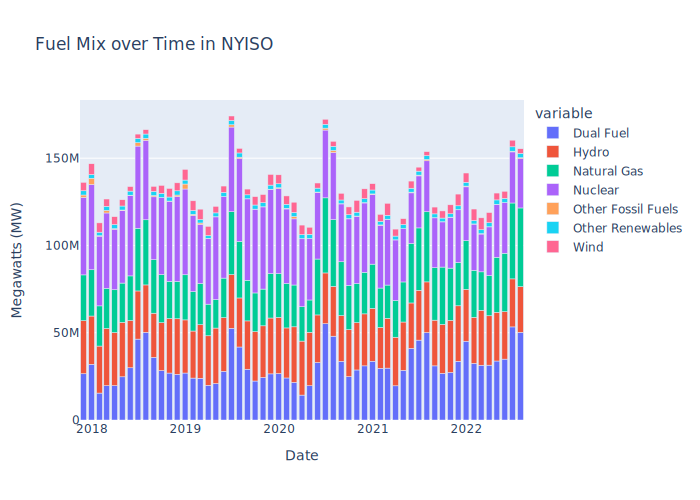

In [30]:
fig = px.bar(data[1:-1], x="Time", y=df.columns[1:], title="Fuel Mix over Time in NYISO")
fig.update_layout(
    xaxis_title="Date", yaxis_title="Megawatts (MW)"
)
fig.show("svg")

we can also look at percentages over time

In [31]:
percentages = data.set_index("Time")

percentages = percentages.div(percentages.sum(axis=1), axis=0).reset_index()

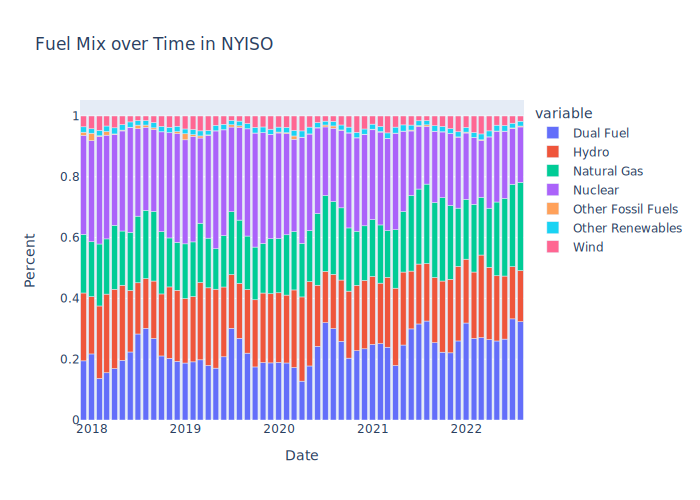

In [32]:
fig = px.bar(percentages[1:-1], x="Time", y=df.columns[1:], title="Fuel Mix over Time in NYISO")
fig.update_layout(
    xaxis_title="Date", yaxis_title="Percent"
)
fig.show("svg")

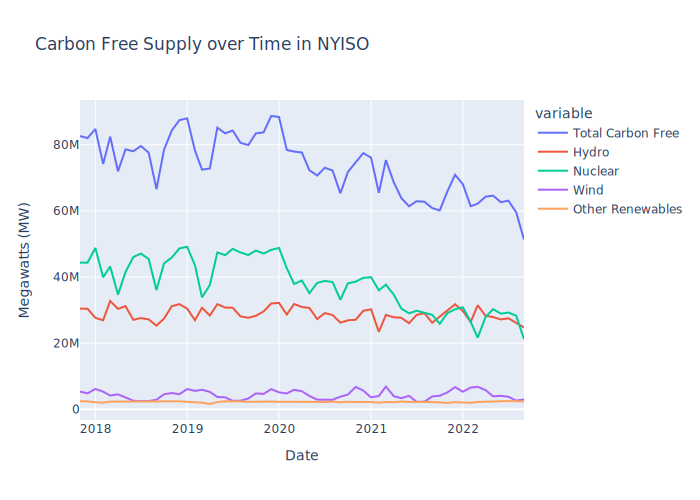

In [33]:
carbon_free = ["Hydro", "Nuclear", "Wind", "Other Renewables"]
data["Total Carbon Free"] = data[carbon_free].sum(axis=1)
fig = px.line(data, x="Time", y=["Total Carbon Free"] + carbon_free, title="Carbon Free Supply over Time in NYISO")
fig.update_layout(
    xaxis_title="Date", yaxis_title="Megawatts (MW)"
)
fig.show("svg")

## Historical Load

In [34]:
iso.get_historical_load(date="Oct 23, 2022")

,Time,Load
0,2022-10-23 00:00:00-04:00,13422.6794
1,2022-10-23 00:05:00-04:00,13366.5626
2,2022-10-23 00:10:00-04:00,13277.2469
3,2022-10-23 00:15:00-04:00,13208.1183
4,2022-10-23 00:20:00-04:00,13201.6277
...,...,...
285,2022-10-23 23:35:00-04:00,13487.9588
286,2022-10-23 23:40:00-04:00,13424.2924
287,2022-10-23 23:45:00-04:00,13354.7159
288,2022-10-23 23:50:00-04:00,13310.1781
